# Important functions:
- ``.str.method``,
- ``.contains()``,
- ``.extract()``,
- ``.to_datetime()``,
- ``.get_dummies()``,
- ``.add_prefix()``,
- ``.sample()``,
- `regex`,
- ``.to_numeric()``,
- ``.isin()``,
- ``.corr()``.
- ``.strip()``

### Notes
- 'Air conditioning,Automatic climate control,Cruise control,Leather steering wheel,Lumbar support,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system'
mesela bu satır; Comfort&Convenience sütununun listeler dışına çıkarılmış sade bir string değeri. Virgüllerle ayrılmış unique değerlerden oluşuyor.

- Burada virgül şart değil. Başka karakterlerle de ayırabilirsiniz. Ancak bu belirleyeceğiniz karakter (char), daha sonra get_dummies(sep ="char") yaparken kullanacağınız sep değeri ile aynı olmalıdır.

- mümkün mertebe en fazla sayıda örneklemle (satırla) çalışmak en ideali. Bu çok önemli

### EDA Projesinde izlenecek özet yol :
- araba fiyatının belirlenmesine etki etmeyecek olan ve yüksek nan'a sahip olan sütunları düşür
- bozuk formattaki yapıları düzeltip sade ve anlamlı string/numeric değerlere dönüştür
- kalan tüm sutunların nan'larını en mantıklı şekilde doldur.
- tüm sutunların numeric değer almasını sağla. (kategorik olan sütunlar get_dummies() ile numeric olacak)
- tüm sutunların outlier'larını gider
- sonuç df'i csv olarak kaydet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  # hem uyarı satırlarını hem de çıktı sonuçlarını bir arada görebilmenizi sağlar.
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [42]:
df = pd.read_json("scout_1.json")

In [43]:
df.head()

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp,Type,...,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,Country version
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,66 kW,"[, Used, , Diesel (Particulate Filter)]",...,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",None,None
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,141 kW,"[, Used, , Gasoline]",...,"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n7\n],None
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,85 kW,"[, Used, , Diesel (Particulate Filter)]",...,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",None,None
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",...,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",[\n6\n],None
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,"16,200 km",05/2016,1 previous owner,66 kW,"[, Used, , Diesel (Particulate Filter)]",...,"[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",None,[\nGermany\n]


In [44]:
df["Nr. of Doors"].str[0]

0        \n5\n
1        \n3\n
2        \n4\n
3        \n3\n
4        \n5\n
         ...  
15914    \n5\n
15915    \n5\n
15916    \n5\n
15917    \n5\n
15918    \n5\n
Name: Nr. of Doors, Length: 15919, dtype: object

In [45]:
df["km"] = df.km.apply(lambda x : x.strip(" km"))

In [46]:
df["km"] = df.km.apply(lambda x : (x.replace(',', '')))
df["km"] = df.km.apply(lambda x : (x.replace('-', "0"))) 

In [47]:
df.km.value_counts()  # in km column all values are converted to only number strings

10       1045
0        1043
1         367
5         170
50        148
         ... 
29890       1
19337       1
9150        1
15781       1
44396       1
Name: km, Length: 6689, dtype: int64

In [48]:
df.km = df.km.astype("int64")  # now km column is integer.

In [49]:
df.km.isnull().sum()

0

In [50]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

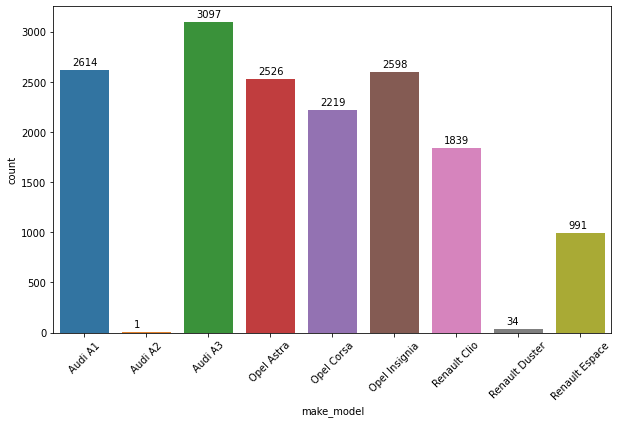

In [51]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df["make_model"])
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))

plt.show()

In [52]:
df.body_type.value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [53]:
df.body_type.isnull().sum()

60

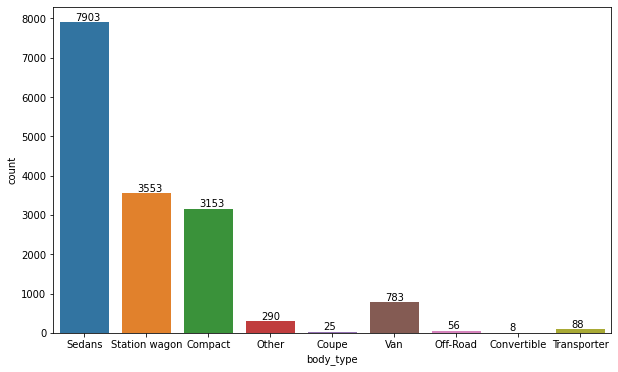

In [54]:
# ax = df.body_type.value_counts(dropna = False).plot.bar(rot = 45, figsize = (10,6))
plt.figure(figsize = (10,6))
ax = sns.countplot(df["body_type"])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+50))

plt.show()

In [55]:
df.isnull().sum().sort_values()

make_model                      0
Gearing Type                    0
Model                           0
hp                              0
registration                    0
Make                            0
Fuel                            0
price                           0
km                              0
Type                            2
short_description              46
body_type                      60
Nr. of Doors                  212
Displacement                  496
Body Color                    597
\nComfort & Convenience\n     920
Nr. of Seats                  977
\nSafety & Security\n         982
\nEntertainment & Media\n    1374
First Registration           1597
CO2 Emission                 1808
Consumption                  1906
\nExtras\n                   2962
Emission Class               3021
Upholstery                   3720
vat                          4513
Gears                        4712
Cylinders                    5680
Paint Type                   5772
prev_owner    

In [56]:
df1 = df

In [57]:
df1["Gearing Type"].head()

0    [\n, Automatic, \n]
1    [\n, Automatic, \n]
2    [\n, Automatic, \n]
3    [\n, Automatic, \n]
4    [\n, Automatic, \n]
Name: Gearing Type, dtype: object

In [60]:
df1["Gearing Type"] = df1["Gearing Type"].str[1] # converted into only string

In [61]:
df1["Gearing Type"].isnull().sum()

0

In [62]:
df1["Gearing Type"].value_counts(dropna = False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

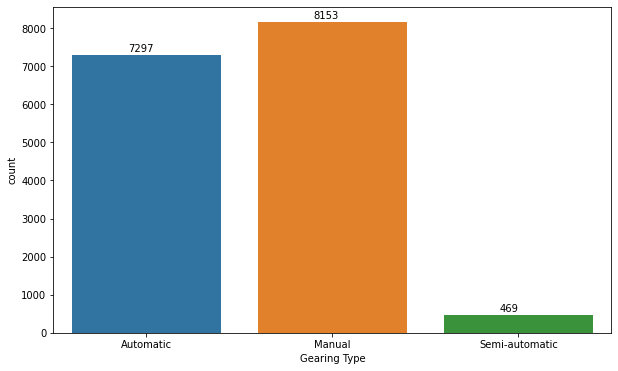

In [63]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df["Gearing Type"])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+100))

plt.show()

In [64]:
df1["Model"].head()

0    [\n, A1, \n]
1    [\n, A1, \n]
2    [\n, A1, \n]
3    [\n, A1, \n]
4    [\n, A1, \n]
Name: Model, dtype: object

In [65]:
df1["Model"] = df1["Model"].str[1]  # converted into only string

In [66]:
df1["Model"].isnull().sum()

0

In [67]:
df1["Model"].value_counts(dropna = False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

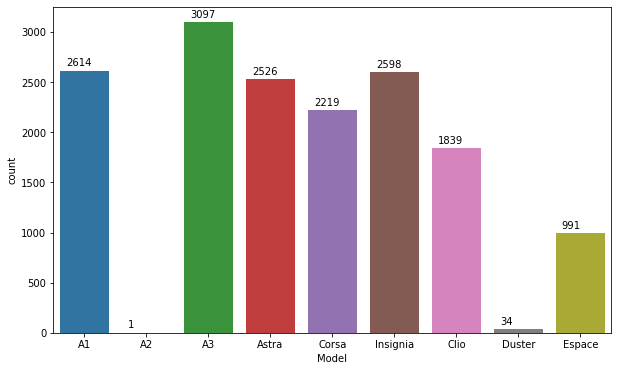

In [68]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df1["Model"])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

In [95]:
df1.hp.head()

0     66 kW
1    141 kW
2     85 kW
3     66 kW
4     66 kW
Name: hp, dtype: object

In [96]:
df2 = df1.rename(columns={"hp": "hp_kW"})

In [97]:
df2.hp_kW.head()

0     66 kW
1    141 kW
2     85 kW
3     66 kW
4     66 kW
Name: hp_kW, dtype: object

In [98]:
df2.hp_kW.str.strip(" kW")

0         66
1        141
2         85
3         66
4         66
        ... 
15914    147
15915    165
15916    146
15917    147
15918    165
Name: hp_kW, Length: 15919, dtype: object

In [99]:
df2["hp_kW"] = df2["hp_kW"].str.strip(" kW")  # converted into only numbers string

In [107]:
df2["hp_kW"].unique()

array(['66', '141', '85', '70', '92', '112', '60', '71', '67', '110',
       '93', '147', '86', '140', '87', '-', '81', '82', '135', '132',
       '100', '96', '162', '150', '294', '228', '270', '137', '9', '133',
       '77', '101', '78', '103', '1', '74', '118', '84', '88', '80', '76',
       '149', '44', '51', '55', '52', '63', '40', '65', '75', '125',
       '120', '184', '239', '121', '143', '191', '89', '195', '127',
       '122', '154', '155', '104', '123', '146', '90', '53', '54', '56',
       '164', '4', '163', '57', '119', '165', '117', '115', '98', '168',
       '167'], dtype=object)

In [108]:
df2["hp_kW"] = df2["hp_kW"].str.replace('-', "")

In [109]:
df2["hp_kW"] = pd.to_numeric(df2["hp_kW"])  # now all data are converted into numeric

In [110]:
df2["hp_kW"].unique() 

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  nan,  81.,  82., 135., 132., 100.,  96.,
       162., 150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78.,
       103.,   1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  44.,  51.,
        55.,  52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121.,
       143., 191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,
        90.,  53.,  54.,  56., 164.,   4., 163.,  57., 119., 165., 117.,
       115.,  98., 168., 167.])

In [111]:
df2["hp_kW"].dtypes  # sehr gut 

dtype('float64')

In [112]:
df2.Make.value_counts(dropna = False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [113]:
df2["Make"] = df2["Make"].str.strip("\n")  # converted into string type

In [114]:
df2.Make.value_counts(dropna = False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

In [115]:
df2.Fuel.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Super Plus 98 / Super E10 95, \n]                                                                                    1
[\n, Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91 / Super E10 95 / Super Plus 98 / Super Plus E10 98, \n]       1
[\n, Sup

In [117]:
df2["Fuel"] = df2["Fuel"].str[1]

In [120]:
df2.Fuel.value_counts(dropna = False)

Diesel (Particulate Filter)                                                                                  4315
Super 95                                                                                                     3338
Gasoline                                                                                                     3175
Diesel                                                                                                       2984
Super 95 / Regular/Benzine 91                                                                                 424
                                                                                                             ... 
Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91                                                          1
Others (Particulate Filter)                                                                                     1
Super 95 / Regular/Benzine E10 91 / Super E10 95                                        

In [121]:
df2[["Fuel", "Make"]].isnull().sum()

Fuel    0
Make    0
dtype: int64

In [122]:
df2[["Fuel", "Make"]]

,Fuel,Make
0,Diesel (Particulate Filter),Audi
1,Gasoline,Audi
2,Diesel (Particulate Filter),Audi
3,Diesel (Particulate Filter),Audi
4,Diesel (Particulate Filter),Audi
...,...,...
15914,Diesel (Particulate Filter),Renault
15915,Super 95 / Super Plus 98 (Particulate Filter),Renault
15916,Diesel,Renault
15917,Diesel,Renault


In [123]:
df2.body_type

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body_type, Length: 15919, dtype: object

In [126]:
df2.Type = df2.Type.str[1]

In [127]:
df3 = df2

In [128]:
df3.Type.value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

In [129]:
df3["Fuel"].unique()

array(['Diesel (Particulate Filter)', 'Gasoline', 'Super 95',
       'Regular/Benzine 91', 'Diesel',
       'Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98',
       'Super E10 95', 'Super 95 (Particulate Filter)',
       'Super 95 / Regular/Benzine 91',
       'Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
       'Super E10 95 / Super 95',
       'Super 95 / Regular/Benzine 91 / Super Plus 98',
       'Super 95 / Super Plus 98 / Super E10 95',
       'Super 95 / Super Plus 98',
       'Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91',
       'Others', 'Super 95 / Super E10 95',
       'Gasoline (Particulate Filter)',
       'Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
       'Super E10 95 / Super 95 / Super Plus 98 / Super Plus E10 98 (Particulate Filter)',
       'Regular/Benzine E10 91',
  

In [130]:
pd.set_option('display.max_columns', None)
df3.head()

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp_kW,Type,Non-smoking Vehicle,Make,Model,First Registration,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,Country version
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,01/2016,2 previous owners,66.0,Used,"[\n, \n]",Audi,A1,"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],Automatic,"[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",None,None
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,03/2017,None,141.0,Used,None,Audi,A1,"[\n, 2017, \n]","[\n, Red, \n]",None,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],Automatic,"[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],Gasoline,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n7\n],None
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,02/2016,1 previous owner,85.0,Used,None,Audi,A1,"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],Automatic,"[\n1,598 cc\n]",None,None,[\nfront\n],Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",None,None
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,08/2016,1 previous owner,66.0,Used,"[\n, \n, \nEuro 6\n]",Audi,A1,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],None,[\n3\n],[\n4\n],Automatic,"[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",None,Diesel (Particulate Filter),"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",[\n6\n],None
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200,05/2016,1 previous owner,66.0,Used,"[\n, \n]",Audi,A1,"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],Automatic,"[\n1,422 cc\n]",[\n3\n],None,[\nfront\n],Diesel (Particulate Filter),"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",None,[\nGermany\n]


In [131]:
df3[df3.Fuel.str.contains(pat = "Diesel|diesel")]["make_model"]

0               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
5               Audi A1
              ...      
15911    Renault Espace
15912    Renault Espace
15914    Renault Espace
15916    Renault Espace
15917    Renault Espace
Name: make_model, Length: 7300, dtype: object

In [132]:
df3[df3.Fuel.str.contains(pat = "Benzine|Super|Gasoline|Super|Regular")]["Fuel"]


1                                             Gasoline
9                                             Gasoline
11                                            Super 95
12                                  Regular/Benzine 91
13                                            Gasoline
                             ...                      
15908                                         Gasoline
15910                           Regular/Benzine E10 91
15913                                         Super 95
15915    Super 95 / Super Plus 98 (Particulate Filter)
15918                                         Super 95
Name: Fuel, Length: 8549, dtype: object

In [133]:
df3[df3.Fuel.str.contains(pat = "LPG|Biogas|CNG|H")]["make_model"]

2647          Audi A3
2648          Audi A3
2649          Audi A3
2650          Audi A3
2665          Audi A3
             ...     
13989    Renault Clio
14144    Renault Clio
14216    Renault Clio
14557    Renault Clio
14655    Renault Clio
Name: make_model, Length: 64, dtype: object

In [134]:
df3[df3.Fuel.str.contains(pat = "Electric")]["make_model"]

3356          Audi A3
3612          Audi A3
3615          Audi A3
3617          Audi A3
13397    Renault Clio
Name: make_model, dtype: object

In [135]:
df4 = df3.copy()

##### We can make 4 basic fuel type: Benzin, Diesel, Electric, CNG

In [136]:
df4[df4.Fuel.str.contains(pat = "Diesel|diesel")].Fuel

0        Diesel (Particulate Filter)
2        Diesel (Particulate Filter)
3        Diesel (Particulate Filter)
4        Diesel (Particulate Filter)
5        Diesel (Particulate Filter)
                    ...             
15911    Diesel (Particulate Filter)
15912    Diesel (Particulate Filter)
15914    Diesel (Particulate Filter)
15916                         Diesel
15917                         Diesel
Name: Fuel, Length: 7300, dtype: object

In [78]:
list(df4[df4.Fuel.str.contains(pat = "Diesel|diesel")].Fuel)

['Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel',
 'Diesel',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel',
 'Diesel',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel',
 'Diesel',
 'Diesel (Particulate Filter)',
 'Diesel',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel',
 'Diesel',
 'Diesel (Particulate Filter)',
 'Diesel',
 'Diesel (Particulate Filter)',
 'Diesel (Particulate Filter)',
 'Diesel (Parti

In [137]:
df4['Fuel'] = df4['Fuel'].replace(list(df4[df4.Fuel.str.contains(pat = "Diesel|diesel")].Fuel),'Diesel')

In [138]:
df4[df4.Fuel.str.contains(pat = "Diesel|diesel")].Fuel

0        Diesel
2        Diesel
3        Diesel
4        Diesel
5        Diesel
          ...  
15911    Diesel
15912    Diesel
15914    Diesel
15916    Diesel
15917    Diesel
Name: Fuel, Length: 7300, dtype: object

In [139]:
list(df4[df4.Fuel.str.contains(pat = "Benzine|Super|Gasoline|Super|Regular")].Fuel)
df4['Fuel'] = df4['Fuel'].replace(list(df4[df4.Fuel.str.contains(pat = "Benzine|Super|Gasoline|Super|Regular")].Fuel),'Benzine')
df4[df4.Fuel.str.contains(pat = "Benzine")].Fuel

1        Benzine
9        Benzine
11       Benzine
12       Benzine
13       Benzine
          ...   
15908    Benzine
15910    Benzine
15913    Benzine
15915    Benzine
15918    Benzine
Name: Fuel, Length: 8548, dtype: object

In [140]:
list(df4[df4.Fuel.str.contains(pat = "LPG|Biogas|CNG|H")].Fuel)
df4['Fuel'] = df4['Fuel'].replace(list(df4[df4.Fuel.str.contains(pat = "LPG|Biogas|CNG|H")].Fuel),'LPG/CNG')
df4[df4.Fuel.str.contains(pat = "LPG/CNG")].Fuel

2647     LPG/CNG
2648     LPG/CNG
2649     LPG/CNG
2650     LPG/CNG
2665     LPG/CNG
          ...   
13989    LPG/CNG
14144    LPG/CNG
14216    LPG/CNG
14557    LPG/CNG
14655    LPG/CNG
Name: Fuel, Length: 64, dtype: object

In [141]:
list(df4[df4.Fuel.str.contains(pat = "Electric")].Fuel)
df4['Fuel'] = df4['Fuel'].replace(list(df4[df4.Fuel.str.contains(pat = "Electric")].Fuel),'Electric')
df4[df4.Fuel.str.contains(pat = "Electric")].Fuel

13397    Electric
Name: Fuel, dtype: object

In [142]:
df4.Fuel.value_counts(dropna = False)  # We have others and will handle this later.

Benzine                        8548
Diesel                         7300
LPG/CNG                          64
Others                            5
Others (Particulate Filter)       1
Electric                          1
Name: Fuel, dtype: int64

In [146]:
df4

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp_kW,Type,Non-smoking Vehicle,Make,Model,First Registration,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,Country version
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,01/2016,2 previous owners,66.0,Used,"[\n, \n]",Audi,A1,"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],Automatic,"[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",None,None
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,03/2017,None,141.0,Used,None,Audi,A1,"[\n, 2017, \n]","[\n, Red, \n]",None,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],Automatic,"[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],Benzine,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\n7\n],None
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,02/2016,1 previous owner,85.0,Used,None,Audi,A1,"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],Automatic,"[\n1,598 cc\n]",None,None,[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",None,None
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000,08/2016,1 previous owner,66.0,Used,"[\n, \n, \nEuro 6\n]",Audi,A1,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],None,[\n3\n],[\n4\n],Automatic,"[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",None,Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",[\n6\n],None
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200,05/2016,1 previous owner,66.0,Used,"[\n, \n]",Audi,A1,"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],Automatic,"[\n1,422 cc\n]",[\n3\n],None,[\nfront\n],Diesel,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n109 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",None,[\nGermany\n]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,0,-/-,None,147.0,New,None,Renault,Espace,None,"[\n, Grey, \n]",[\nMetallic\n],None,[\n5\n],[\n5\n],Automatic,"[\n1,997 cc\n]",[\n4\n],"[\n1,758 kg\n]",[\nfront\n],Diesel,"[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],None,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen]","[ABS, Central door lock, Central door lock wit...",[\n6\n],None
15915,Renault Espace,"TCe 225 EDC GPF LIM

In [147]:
df4.Type.value_counts()

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: Type, dtype: int64

In [148]:
df4.to_json("scout_2.json")